 ph : 물의 ph 농도

 Hardness : 물의 경도 (물의 칼슘과 마그네슘 이온의 농도)

 Solids : 총용존 고형물 (액체가 아닌 모든 물질)

 Chloramines : 물 속의 클로라민 농도
	         (수돗물의 정화에 쓰이는 암모니아와 염소가 반응하여 생성되는 무색의 액체이다.)

 Sulfate : 물 속의 황산염 농도

 Conductivity : 물의 전기 전도도

 Organic_carbon : 물 속의 유기 탄소 함유량

 Trihalomethanes : 물 속의 트라이할로메탄 농도 (염소 소독시 발생하는 소독 부산물이다.)

 Turbidity : 물의 탁한 정도

 Potability : 음용성

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/water_potability.csv")
data.head()

Mounted at /content/drive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### 총 instance 갯수는 3276개
- ph, sulfate, Trihalomethanes에서 결측치 발생

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
len(data)

3276

In [5]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [6]:
print(data['ph'].mean())
print(data['Sulfate'].mean())
print(data['Trihalomethanes'].mean())

7.080794504276835
333.7757766108135
66.39629294676803


In [7]:
# 모든 행,열 출력하기
# => 모든 값이 다 높게 나오기에 평균으로 대체해도 될듯
# pd.set_option('display.max_rows', None)
data['Sulfate']

0       368.516441
1              NaN
2              NaN
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272           NaN
3273           NaN
3274           NaN
3275           NaN
Name: Sulfate, Length: 3276, dtype: float64

In [8]:
# 결측치 평균으로 대체
data = data.fillna(data.mean())

In [9]:
# 결측치 평균으로 대체된거 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
Xf = data.drop(['Potability'],axis=1)
yf = data['Potability']

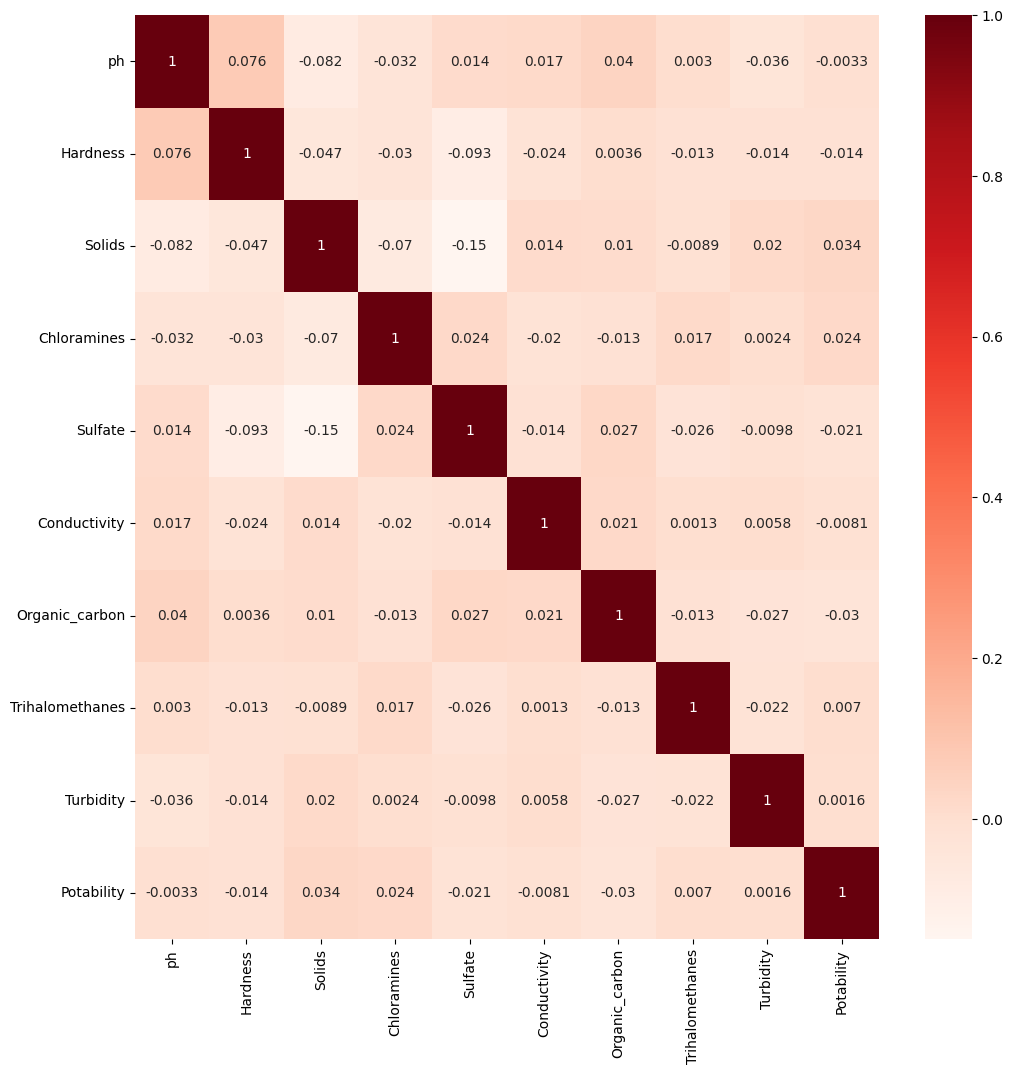

In [11]:
import seaborn as sns

plt.figure(figsize=(12,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
# train,test set을 7:3으로 나눔
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.3)

In [13]:
# feature importance로 입력변수 정하기
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    max_leaf_nodes = 16,
    max_features = 'auto',
    max_samples=0.5,
    bootstrap = True,
    n_jobs=-1
)

## feature selection 하기전 roc_auc 0.62

In [14]:
from sklearn.metrics import roc_auc_score

rnd_clf = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba = rnd_clf.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba))

0.6279171977321671


In [15]:
for name, score in zip(Xf.columns, rnd_clf.feature_importances_):
    print(name, score)

ph 0.1274915282638465
Hardness 0.11960130121744278
Solids 0.11673994901611305
Chloramines 0.1170740139634653
Sulfate 0.12695333255770497
Conductivity 0.09871813270265045
Organic_carbon 0.09565123068209419
Trihalomethanes 0.09848912816324357
Turbidity 0.09928138343343923


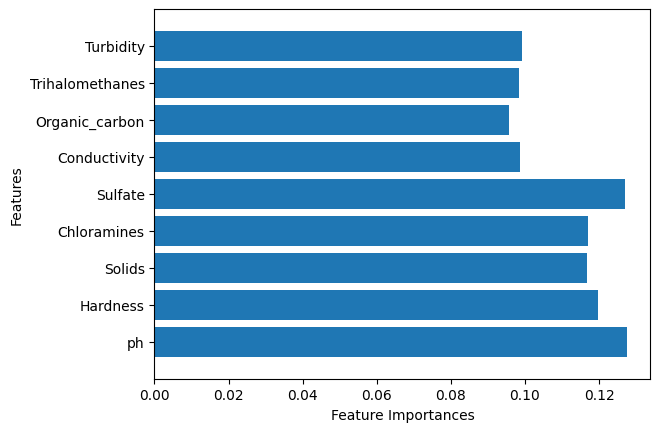

In [16]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xf_train.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(rnd_clf)

In [17]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Turbidity'],axis=1)
Xf_test=Xf_test.drop(['Turbidity'],axis=1)

## 중요도가 낮은걸 저장한 결과 roc_auc가 조금 더 낮아짐 하지만 별로 차이가 없기때문에 drop -> 입력변수는 적을 수록 좋음

In [18]:
rnd_clf1 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf1.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba1 = rnd_clf1.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba1))

0.6505955258647211


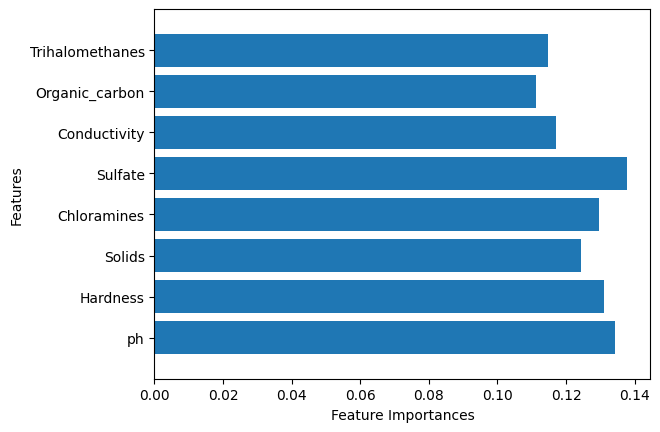

In [19]:
plot_feature_importances(rnd_clf1)

In [20]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Organic_carbon'],axis=1)
Xf_test=Xf_test.drop(['Organic_carbon'],axis=1)

In [21]:
rnd_clf2 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf2.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba2 = rnd_clf2.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba2))

0.6481123368347032


## Organic_carbon한 결과 68%로 성능이 좋아졌다

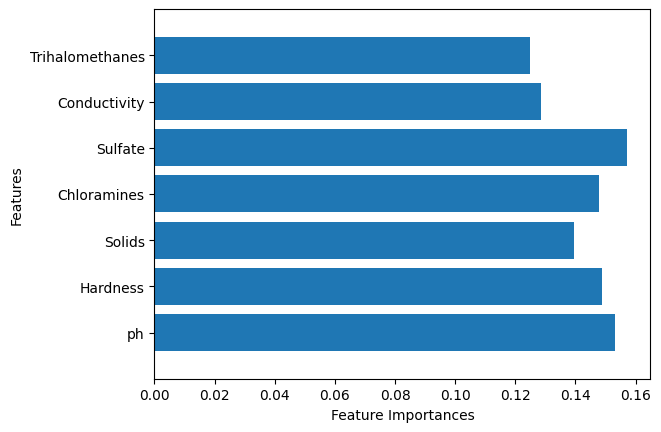

In [22]:
plot_feature_importances(rnd_clf2)

In [23]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Trihalomethanes'],axis=1)
Xf_test=Xf_test.drop(['Trihalomethanes'],axis=1)

In [24]:
# 성능이 더 안좋아지기에 더이상 feature importnace론 입력변수 구하지 않음

rnd_clf3 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf3.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba3 = rnd_clf3.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba3))

0.6612073133213202


In [25]:
Xf_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'], dtype='object')

## feature importance를 통해 입력변수 선정 - 6개
'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'

## vif로 입력변수 선정해보고자함

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame() # DF 생성
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return(vif)

calc_vif(Xf_train)

,variables,VIF
0,ph,22.190629
1,Hardness,28.838710
2,Solids,6.726468
3,Chloramines,19.275261
4,Sulfate,45.358498
5,Conductivity,24.830030


In [27]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Sulfate'],axis=1)
Xf_test=Xf_test.drop(['Sulfate'],axis=1)

In [28]:
calc_vif(Xf_train)

,variables,VIF
0,ph,19.894822
1,Hardness,25.496481
2,Solids,6.648634
3,Chloramines,17.116290
4,Conductivity,22.006484


In [29]:
rnd_clf4 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf4.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba4 = rnd_clf4.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba4))

0.6067353755548719


In [30]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Hardness'],axis=1)
Xf_test=Xf_test.drop(['Hardness'],axis=1)

In [31]:
calc_vif(Xf_train)

,variables,VIF
0,ph,16.727986
1,Solids,6.497055
2,Chloramines,15.546704
3,Conductivity,19.382453


In [32]:
rnd_clf5 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf5.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba5 = rnd_clf5.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba5))

0.57772601415198


In [33]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Conductivity'],axis=1)
Xf_test=Xf_test.drop(['Conductivity'],axis=1)

In [34]:
calc_vif(Xf_train)

,variables,VIF
0,ph,12.822450
1,Solids,5.983290
2,Chloramines,12.697873


In [35]:
rnd_clf6 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf6.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba6 = rnd_clf6.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba6))

0.548758405484991


# vif론 하면 독립변수를 구할 경우 roc_auc가 매우 안좋아짐으로 vif론 입력변수 정하지않고 feature importance로만 입력변수를 정함
'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'

In [36]:
X = data.drop(['Potability','ph','Hardness','Solids','Chloramines','Sulfate','Conductivity'],axis=1)
y = data['Potability']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

------------전처리끝-------------------

# Decision Tree Classfier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
DT = dc.fit(X_train,y_train)
dc_pred = dc.predict(X_test)

Accuracy score:  0.5228658536585366
-----------------------------------
Confusion Matrix:
 [[236 150]
 [163 107]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       386
           1       0.42      0.40      0.41       270

    accuracy                           0.52       656
   macro avg       0.50      0.50      0.50       656
weighted avg       0.52      0.52      0.52       656



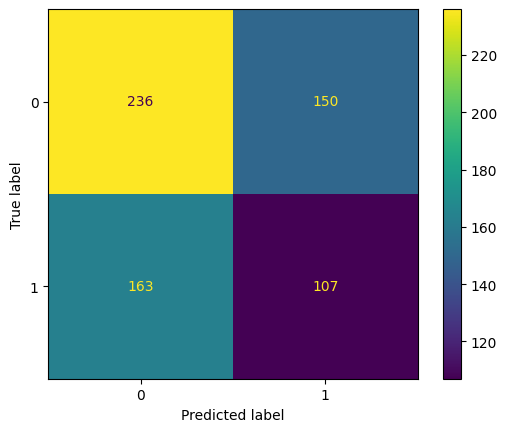

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(dc_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(dc_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(dc_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(dc_pred, y_test)
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(5, 20, 1),
          'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'min_samples_split' : range(2, 100, 10),
          'criterion' : ['gini', 'entropy'],
          'splitter' : ['best', 'random']}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)

y_test_pred = grid_dt.predict(X_test)
y_train_pred = grid_dt.predict(X_train)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

confusion = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Accuracy on train: {accuracy_train:.4f}")
print(f"Accuracy on test: {accuracy_test:.4f}")
print("-------------------------------------------------")
print("Confusion Matrix:\n", confusion)
print("-------------------------------------------------")
print("Classification Report:\n", classification_rep)

print('최적 하이퍼 파라미터: ', grid_dt.best_params_)

Accuracy on train: 0.6111
Accuracy on test: 0.6098
-------------------------------------------------
Confusion Matrix:
 [[397   2]
 [254   3]]
-------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.99      0.76       399
           1       0.60      0.01      0.02       257

    accuracy                           0.61       656
   macro avg       0.60      0.50      0.39       656
weighted avg       0.61      0.61      0.47       656

최적 하이퍼 파라미터:  {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.00030000000000000003, 'min_samples_split': 12, 'splitter': 'random'}


# Random Forest Classfier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
RF = rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

Accuracy score:  0.5746951219512195
-----------------------------------
Confusion Matrix:
 [[318 198]
 [ 81  59]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70       516
           1       0.23      0.42      0.30       140

    accuracy                           0.57       656
   macro avg       0.51      0.52      0.50       656
weighted avg       0.68      0.57      0.61       656



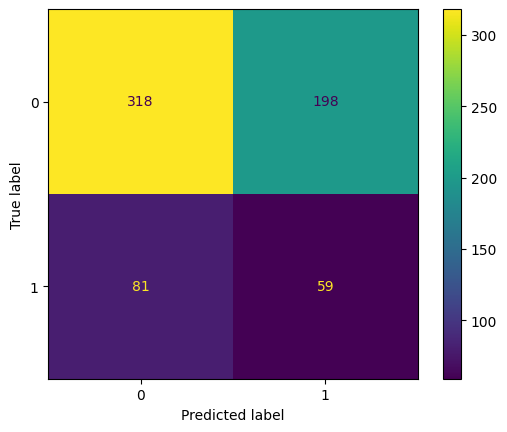

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy score: ', accuracy_score(rf_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(rf_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(rf_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(rf_pred, y_test)
plt.show()

Interpreting the output of Random Forest:


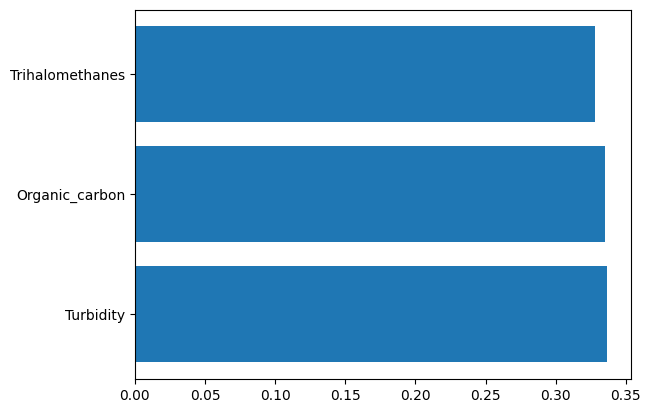

In [43]:
print('Interpreting the output of Random Forest:')
rfi=pd.Series(RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_rf = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_rf.fit(X_train, y_train)

y_test_pred = grid_rf.predict(X_test)
y_train_pred = grid_rf.predict(X_train)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

confusion = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Accuracy on train: {accuracy_train:.4f}")
print(f"Accuracy on test: {accuracy_test:.4f}")
print("-------------------------------------------------")
print("Confusion Matrix:\n", confusion)
print("-------------------------------------------------")
print("Classification Report:\n", classification_rep)

print('최적 하이퍼 파라미터: ', grid_rf.best_params_)

Accuracy on train: 0.6176
Accuracy on test: 0.6006
-------------------------------------------------
Confusion Matrix:
 [[393   6]
 [256   1]]
-------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       399
           1       0.14      0.00      0.01       257

    accuracy                           0.60       656
   macro avg       0.37      0.49      0.38       656
weighted avg       0.42      0.60      0.46       656

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [51]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100,
                                max_depth = 6,
                                min_samples_leaf = 12,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)

y_test_pred = rf_clf1.predict(X_test)
y_train_pred = rf_clf1.predict(X_train)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

confusion = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Accuracy on train: {accuracy_train:.4f}")
print(f"Accuracy on test: {accuracy_test:.4f}")
print("-------------------------------------------------")
print("Confusion Matrix:\n", confusion)
print("-------------------------------------------------")
print("Classification Report:\n", classification_rep)

Accuracy on train: 0.6145
Accuracy on test: 0.6006
-------------------------------------------------
Confusion Matrix:
 [[392   7]
 [255   2]]
-------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       399
           1       0.22      0.01      0.02       257

    accuracy                           0.60       656
   macro avg       0.41      0.50      0.38       656
weighted avg       0.46      0.60      0.46       656

